## US Covid-19 Daily Cases and Deaths   

source: [WHO global covid data](https://covid19.who.int/WHO-COVID-19-global-data.csv) from the WHO Coronavirus (COVID-19) [US Dashboard](https://covid19.who.int/region/amro/country/us)

##### Imports

In [1]:
#Import libraries

import datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

%matplotlib inline

#### Create the directories

In [2]:
# create the data directories
try:
    os.mkdir('data')
    os.mkdir('data/charts')
except FileExistsError:
    pass


#### Import the Data

In [3]:
# Data dowload url
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'

# Download the file contents
file = requests.get(url, allow_redirects=True)

# Write the file contents to disk
open('data/WHO-COVID-19-global-data.csv', 'wb').write(file.content)

# Read the data as a dataframe df
df = pd.read_csv('data/WHO-COVID-19-global-data.csv')

# Drop the columns I don't need
df.drop(['Country', 'WHO_region'], axis=1, inplace=True)

# Filter by US data only usdf
usdf = df[(df['Country_code'] == 'US') & (df['New_cases'] != 0)]

# Display the data head/tail
usdf

,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
209745,2020-01-20,US,1,1,0,0
209750,2020-01-25,US,5,6,0,0
209751,2020-01-26,US,1,7,0,0
209753,2020-01-28,US,1,8,0,0
209758,2020-02-02,US,1,9,0,0
...,...,...,...,...,...,...
210648,2022-07-11,US,34158,87484263,24,1011076
210649,2022-07-12,US,40799,87525062,22,1011098
210650,2022-07-13,US,147972,87673034,265,1011363
210651,2022-07-14,US,207675,87880709,819,1012182


#### Summary

In [4]:
# Summary

# Summary variables
min_new_cases = usdf['New_cases'].min()
max_new_cases = usdf['New_cases'].max()
min_daily_death = usdf['New_deaths'].min()
max_daily_death = usdf['New_deaths'].max()
total_cases = usdf['New_cases'].sum()
total_deaths = usdf['New_deaths'].sum()
now = datetime.datetime.now()

# Summary disply
print('\t\tSUMMARY\n')
print(f"Date and Time: {now.strftime('%Y-%m-%d %H:%M:%S')}\n")
print(f'The minimum cases in a single day = {min_new_cases:10}')
print(f'The maximum cases in a single day = {max_new_cases:10}')
print(f'The minimum deaths in a single day = {min_daily_death:9}')
print(f'The maximum deaths in a single day = {max_daily_death:9}')
print(f'\nTotal cases = {total_cases:32}')
print(f'Total deaths = {total_deaths:31}')


		SUMMARY

Date and Time: 2022-07-18 22:30:51

The minimum cases in a single day =          1
The maximum cases in a single day =    1255933
The minimum deaths in a single day =     -2440
The maximum deaths in a single day =      5084

Total cases =                         88027926
Total deaths =                         1012816


#### Top 5 days with the most deaths


In [5]:
usdf.nlargest(5, 'New_deaths')

,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
210136,2021-02-14,US,97566,27392236,5084,492098
210490,2022-02-03,US,296987,75012119,4186,891785
210106,2021-01-15,US,226984,23070092,4065,400313
210120,2021-01-29,US,158889,25544479,3976,445072
210100,2021-01-09,US,269488,21648765,3967,380399


#### Last 10 days reported

In [6]:
usdf.tail(10)

,Date_reported,Country_code,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
210643,2022-07-06,US,49872,86865057,78,1009247
210644,2022-07-07,US,170086,87035143,392,1009639
210645,2022-07-08,US,141821,87176964,543,1010182
210646,2022-07-09,US,117387,87294351,418,1010600
210647,2022-07-10,US,155754,87450105,452,1011052
210648,2022-07-11,US,34158,87484263,24,1011076
210649,2022-07-12,US,40799,87525062,22,1011098
210650,2022-07-13,US,147972,87673034,265,1011363
210651,2022-07-14,US,207675,87880709,819,1012182
210652,2022-07-15,US,147217,88027926,634,1012816


# Charts

#### Daily cases and deaths per day

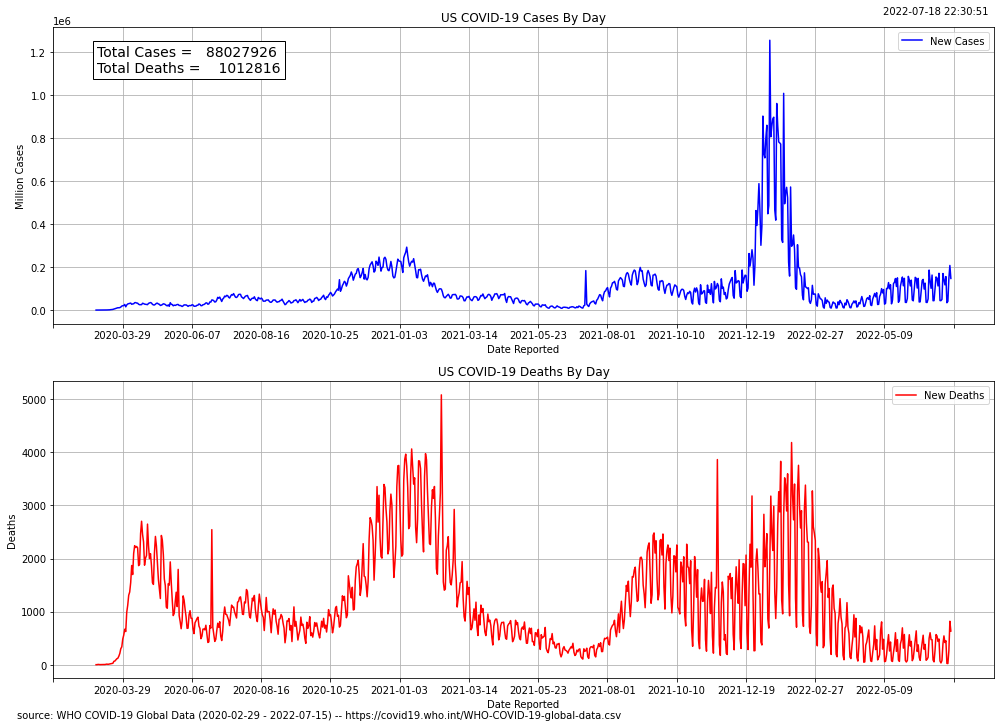

In [7]:
# Drop a single row of negetive deaths data
usdf = usdf[usdf['New_deaths'] > 0]

# Figure text variables
start_date = usdf['Date_reported'].min()
end_date = usdf['Date_reported'].max()

# Figure and text
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,10))
fig.text(0.02,0.003,f'source: WHO COVID-19 Global Data ({start_date} - {end_date}) -- {url}')
fig.text(0.88,0.98,f"{now.strftime('%Y-%m-%d %H:%M:%S')}")
fig.text(0.1,0.9,f'Total Cases = {total_cases:10}\nTotal Deaths = {total_deaths:10}', fontsize=14,
        bbox = dict(facecolor='white', alpha=1))

# New Cases axes settings
ax[0].set(xlabel='Date Reported', ylabel='Million Cases', title='US COVID-19 Cases By Day' )
ax[0].grid()
ax[0].plot(usdf['Date_reported'],usdf['New_cases'],'b', label='New Cases')
ax[0].legend(loc=0, frameon=True)

# New Deaths axes settings
ax[1].set(xlabel='Date Reported', ylabel='Deaths', title='US COVID-19 Deaths By Day' )
ax[1].grid()
ax[1].plot(usdf['Date_reported'], usdf['New_deaths'],'r', label='New Deaths')
ax[1].legend(loc=0, frameon=True)

# x axis label range
start, stop = ax[0].get_xlim()
plt.setp(ax, xticks=np.arange(start, stop+1, 70))

#show the subplots
plt.tight_layout()
plt.show()

In [8]:
# save the chart jpg to data/charts

# unique file name every run
file_path_name = f'data/charts/us_covid19_cd_{now.strftime("%Y%m%d_%H%M%S")}.jpg'

# save figure as jpg
fig.savefig(file_path_name)